In [1]:
%load_ext autoreload
%matplotlib inline

from pathlib import Path
from types import SimpleNamespace
from joblib import delayed, Parallel
import time
import traceback

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 50)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted')
from matplotlib_venn import venn2, venn3

## added TreeMazeanalyses folder using the following command
## conda develop /home/alexgonzalez/Documents/TreeMazeAnalyses2
import TreeMazeAnalyses2.Utils.robust_stats as rs
from TreeMazeAnalyses2.Analyses import subject_info as si
from TreeMazeAnalyses2.Analyses import spatial_functions as spatial_funcs
import TreeMazeAnalyses2.Analyses.open_field_functions as of_funcs

from importlib import reload

import ipywidgets as widgets
from ipywidgets import interact, fixed, interact_manual

In [3]:
%%time
#subjects = ['Li', 'Ne', 'Cl']
subjects = ['Ca']
overwrite_analysis_flag = False
for subject in subjects:
    subject_info = si.SubjectInfo(subject, overwrite=True)
    for session in subject_info.sessions:
        try:
            if 'OF' in session:
                t0=time.time()
                print(f'Processing Session {session}')
                session_info = si.SubjectSessionInfo(subject, session)
                session_info.run_analyses(overwrite=overwrite_analysis_flag)
                #session_info.get_encoding_models(overwrite_analysis_flag)
                #session_info.get_scores(overwrite=True)
                t1 = time.time()
                print(f"Session Processing Completed: {t1-t0:0.2f}s")
                print()
        except KeyboardInterrupt:
            break
        except ValueError:
            pass
        finally:
            pass
            

Processing Session Ca_OF_030419
number of units in session 16
Open Field Track Data not Found or Overwrite= True, creating them.


/home/alexgonzalez/anaconda3/envs/spk_phy2/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


Analysis track_data completed.
Spikes Files not Found or overwrite=1, creating them.
Analysis spikes completed.
Binned Spikes Files not Found or overwrite=1, creating them.
Analysis binned_spikes completed.
Firing Rate Files Not Found or overwrite=1, creating them.
Analysis fr completed.
Open Field Spike Maps not Found or Overwrite= True, creating them.
Analysis spike_maps completed.
Open Field Firing Rate Maps not Found or Overwrite= True, creating them.
Analysis maps completed.
Open Field Score Metrics do not exits or overwrite=True, creating them.
Speed Score Completed: 5.70s
Head Dir Score Completed: 3.33s
Head Ang Score Completed: 3.37s
Border Score Completed: 6.58s
Grid Score Completed: 5.04s
Spatial Stability Score Completed: 1.44s
Analysis scores completed.
Encoding Models do not exist or overwrite=True, creating them.
Speed Model Completed: 0.92s
Head Dir Model Completed: 0.85s
Head Ang Model Completed: 0.84s
Border Model Completed: 0.74s
Grid Model Completed: 32.26s
Spatial S

n_tt                 976.0
n_tt_sorted          419.0
n_tt_curated         109.0
n_valid_clusters       0.0
n_cell                34.0
n_mua                127.0
n_noise             1496.0
n_unsorted          4838.0
dtype: float64

In [2]:
subject = 'Mi'
subject_info = si.SubjectInfo(subject)
print(subject_info.sessions)

['Mi_OF_123019', 'Mi_OF_123119', 'Mi_OF_010220', 'Mi_T3g_010220', 'Mi_OF_010320', 'Mi_T3g_010320', 'Mi_OF_010620', 'Mi_T3g_010620', 'Mi_OF_010820', 'Mi_T3g_010820', 'Mi_T3g_010920', 'Mi_OF_011020', 'Mi_T3g_011020', 'Mi_T3g_011320', 'Mi_T3g_011420', 'Mi_OF_011620', 'Mi_T3g_012020', 'Mi_OF_012020', 'Mi_T3g_012120', 'Mi_OF_012320', 'Mi_T3g_012320', 'Mi_OF_012420', 'Mi_T3g_012420', 'Mi_T3g_012820', 'Mi_OF_012820', 'Mi_T3g_013020', 'Mi_OF_013020', 'Mi_T3g_013120', 'Mi_OF_021020', 'Mi_OF_021120', 'Mi_OF_021220', 'Mi_OF_021320', 'Mi_OF_021720', 'Mi_OF_021820', 'Mi_OF_022020']


In [106]:
subject_info = si.SubjectInfo('Al')
print([s if 'OF' in s else None for s in subject_info.sessions])

[None, None, 'Al_OF_092818', None, 'Al_OF_100118', 'Al_OF_100218', None, 'Al_OF_100318', None, 'Al_OF_100418', None, 'Al_OF_100518', None, None, 'Al_OF_100918', None, 'Al_OF_101018', None, None, None, 'Al_OF_101218', None, None, 'Al_OF_101618', None, None, 'Al_OF_101718', None, 'Al_OF_101818', None, 'Al_OF_101918', None, 'Al_OF_102218', None, 'Al_OF_102318', 'Al_OF_102918', None, None, 'Al_OF_103018', 'AL_OF_103118', None, 'Al_OF_110118', None, 'Al_OF_110218', None, None, None, 'Al_OF_110918', 'Al_OF_111318', None, None, None, None, 'Al_OF_111618', 'Al_OF_111918', None, None, 'Al_OF_112018', 'Al_OF_112118', None]


In [5]:
subject = 'Mi'
subject_info = si.SubjectInfo(subject)
print(subject_info.sessions)
print()
session = subject_info.sessions[2] 
print(session)

['Mi_OF_123019', 'Mi_OF_123119', 'Mi_OF_010220', 'Mi_T3g_010220', 'Mi_OF_010320', 'Mi_T3g_010320', 'Mi_OF_010620', 'Mi_T3g_010620', 'Mi_OF_010820', 'Mi_T3g_010820', 'Mi_T3g_010920', 'Mi_OF_011020', 'Mi_T3g_011020', 'Mi_T3g_011320', 'Mi_T3g_011420', 'Mi_OF_011620', 'Mi_T3g_012020', 'Mi_OF_012020', 'Mi_T3g_012120', 'Mi_OF_012320', 'Mi_T3g_012320', 'Mi_OF_012420', 'Mi_T3g_012420', 'Mi_T3g_012820', 'Mi_OF_012820', 'Mi_T3g_013020', 'Mi_OF_013020', 'Mi_T3g_013120', 'Mi_OF_021020', 'Mi_OF_021120', 'Mi_OF_021220', 'Mi_OF_021320', 'Mi_OF_021720', 'Mi_OF_021820', 'Mi_OF_022020']

Mi_OF_010220


In [6]:
si = reload(si)
session_info = si.SubjectSessionInfo(subject, session)
a=session_info.get_raw_track_data()

number of units in session 4


In [7]:
session_info.task_params['height']

49

In [8]:
session_info.get_encoding_models()

Encoding Models do not exist or overwrite=True, creating them.
Speed Model Completed: 0.56s
Head Dir Model Completed: 0.41s
Head Ang Model Completed: 0.41s
Border Model Completed: 0.40s
Grid Model Completed: 16.06s
Spatial Stability Model Completed: 4.14s


,unit_id,metric,value,split,model
0,0,r2,0.0157738,train,speed
1,1,r2,0.0114939,train,speed
2,2,r2,0.00431039,train,speed
3,3,r2,0.00148795,train,speed
4,0,ar2,0.0146507,train,speed
...,...,...,...,...,...
15,3,n_err,3.02572,test,pos
16,0,map_r,0.821583,test,pos
17,1,map_r,0.809571,test,pos
18,2,map_r,0.470549,test,pos


(-150.0, 150.0)

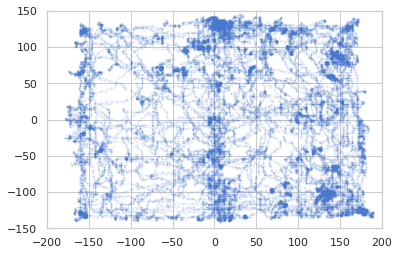

In [6]:
a = session_info.get_raw_track_data()
x = a[1]-390
y = a[2]-265

f,ax=plt.subplots()
ax.scatter(x,y, 1, alpha=0.1)
ax.set_xlim([-200, 200])
ax.set_ylim([-150, 150])

(-630.0, 630.0)

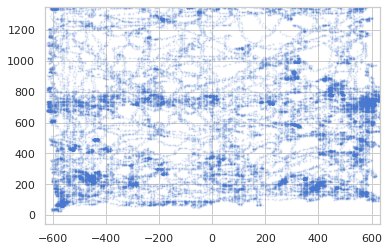

In [10]:
xr,yr=spatial_funcs.rotate_xy(x,y,np.pi/2)

f,ax=plt.subplots()
ax.scatter(xr*1300/290,yr*1450/380+750, 1, alpha=0.1)
ax.set_ylim([-60, 1350])
ax.set_xlim([-630, 630])

In [24]:
session_info = si.SubjectSessionInfo('Li', 'Li_OF_070218')

number of units in session 29


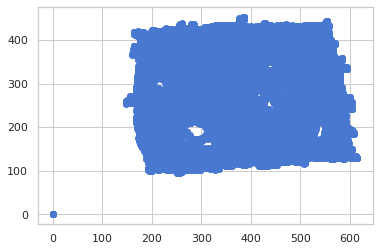

In [25]:
a=session_info.get_raw_track_data()
plt.scatter(a[1], a[2])